# Prodigy Infotech

Author: Aarti Wani

Data Science Intern

Task-04

Task: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [ ]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
# Loading training and testin dataset
col=['Tweet_ID','Entity','Sentiment','Tweet_content']
train_data=pd.read_csv('twitter_training.csv',names=col)
test_data=pd.read_csv('twitter_validation.csv',names=col)
train_data.head() # Checking first five records of training dataset

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Checking first five records of testing dataset
test_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
# Checking the dimensions of training dataset
train_data.shape

(74682, 4)

In [ ]:
# Checking the dimensions of testing dataset
test_data.shape

(1000, 4)

In [ ]:
# Checking the datatypes of features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Checking missing values of training dataset
train_data.isna().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64

In [ ]:
# Checking the duplicate values
train_data.duplicated().sum()

2700

In [ ]:
# removing missing values
train_data=train_data.dropna()
train_data.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [ ]:
# removing duplicate values
train_data=train_data.drop_duplicates()
train_data.duplicated().sum()

0

In [ ]:
# Checking missing values in testing dataset
test_data.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [ ]:
# Checking duplicate values in testing dataset
test_data.duplicated().sum()

0

In [ ]:
# Checking the distribution of sentiment
train_data['Sentiment'].value_counts()

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiment')

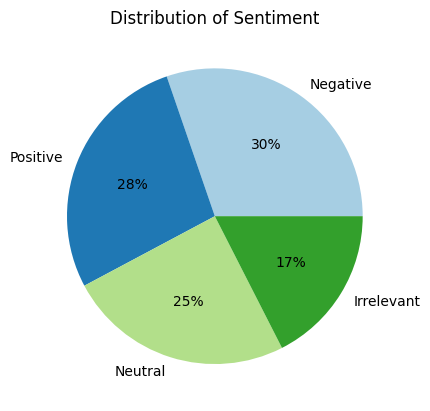

In [ ]:
# Checking percentages of sentients in tweet
palette=sns.color_palette('Paired')
plt.pie(x=train_data['Sentiment'].value_counts(),labels=['Negative','Positive','Neutral','Irrelevant'],autopct='%.0f%%',colors=palette)
plt.title('Distribution of Sentiment')
# It is clear that negative sentiments are more in a tweeet.

In [ ]:
# Checking the distribution of entity
train_data['Entity'].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                            

In [ ]:
df=train_data.groupby(['Entity','Sentiment']).count()

Text(0.5, 1.0, 'Tweet per Entity')

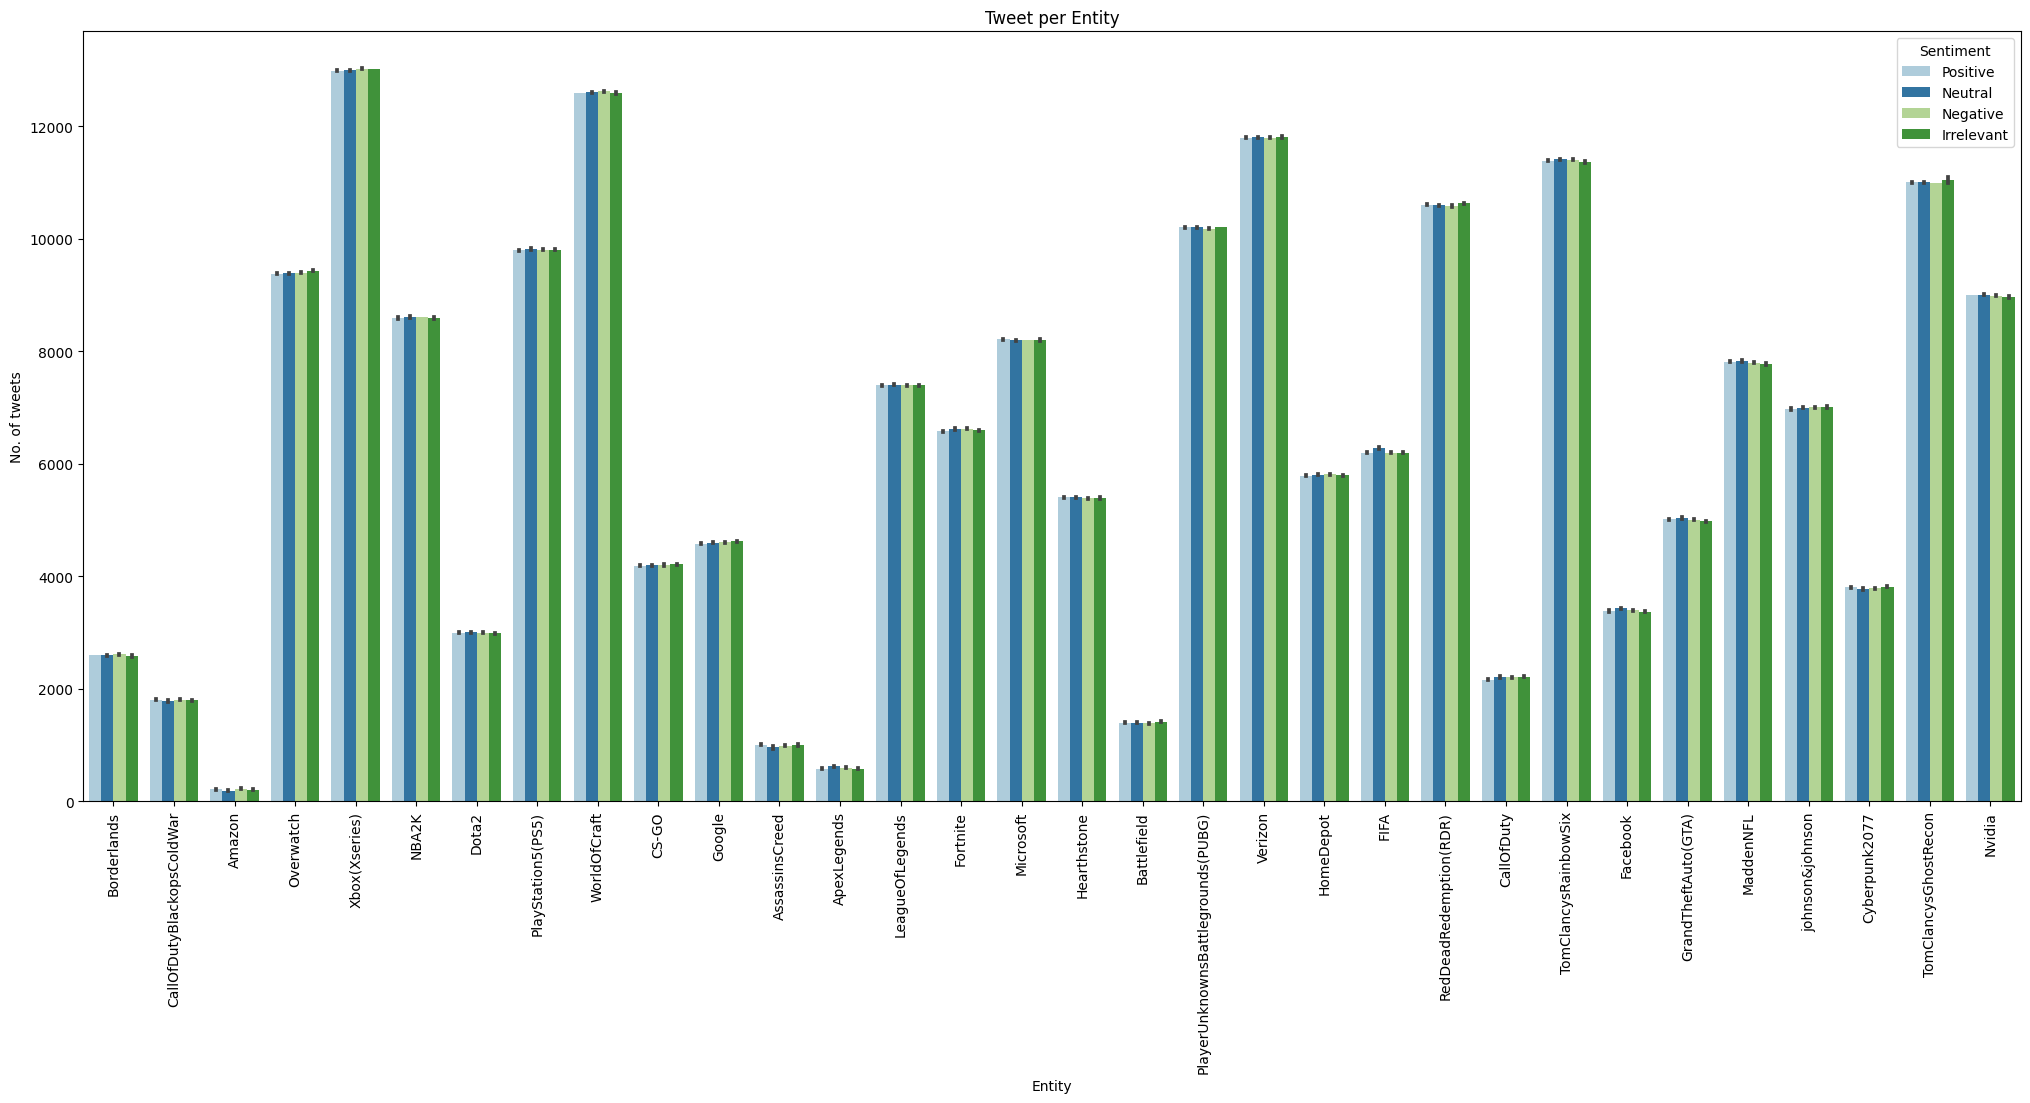

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(train_data, x = "Entity", y = "Tweet_ID",hue = "Sentiment",palette='Paired')
plt.xticks(rotation=90)
plt.ylabel("No. of tweets")
plt.title("Tweet per Entity")
# from graph it is clear that 'Xbox' entity had more tweets

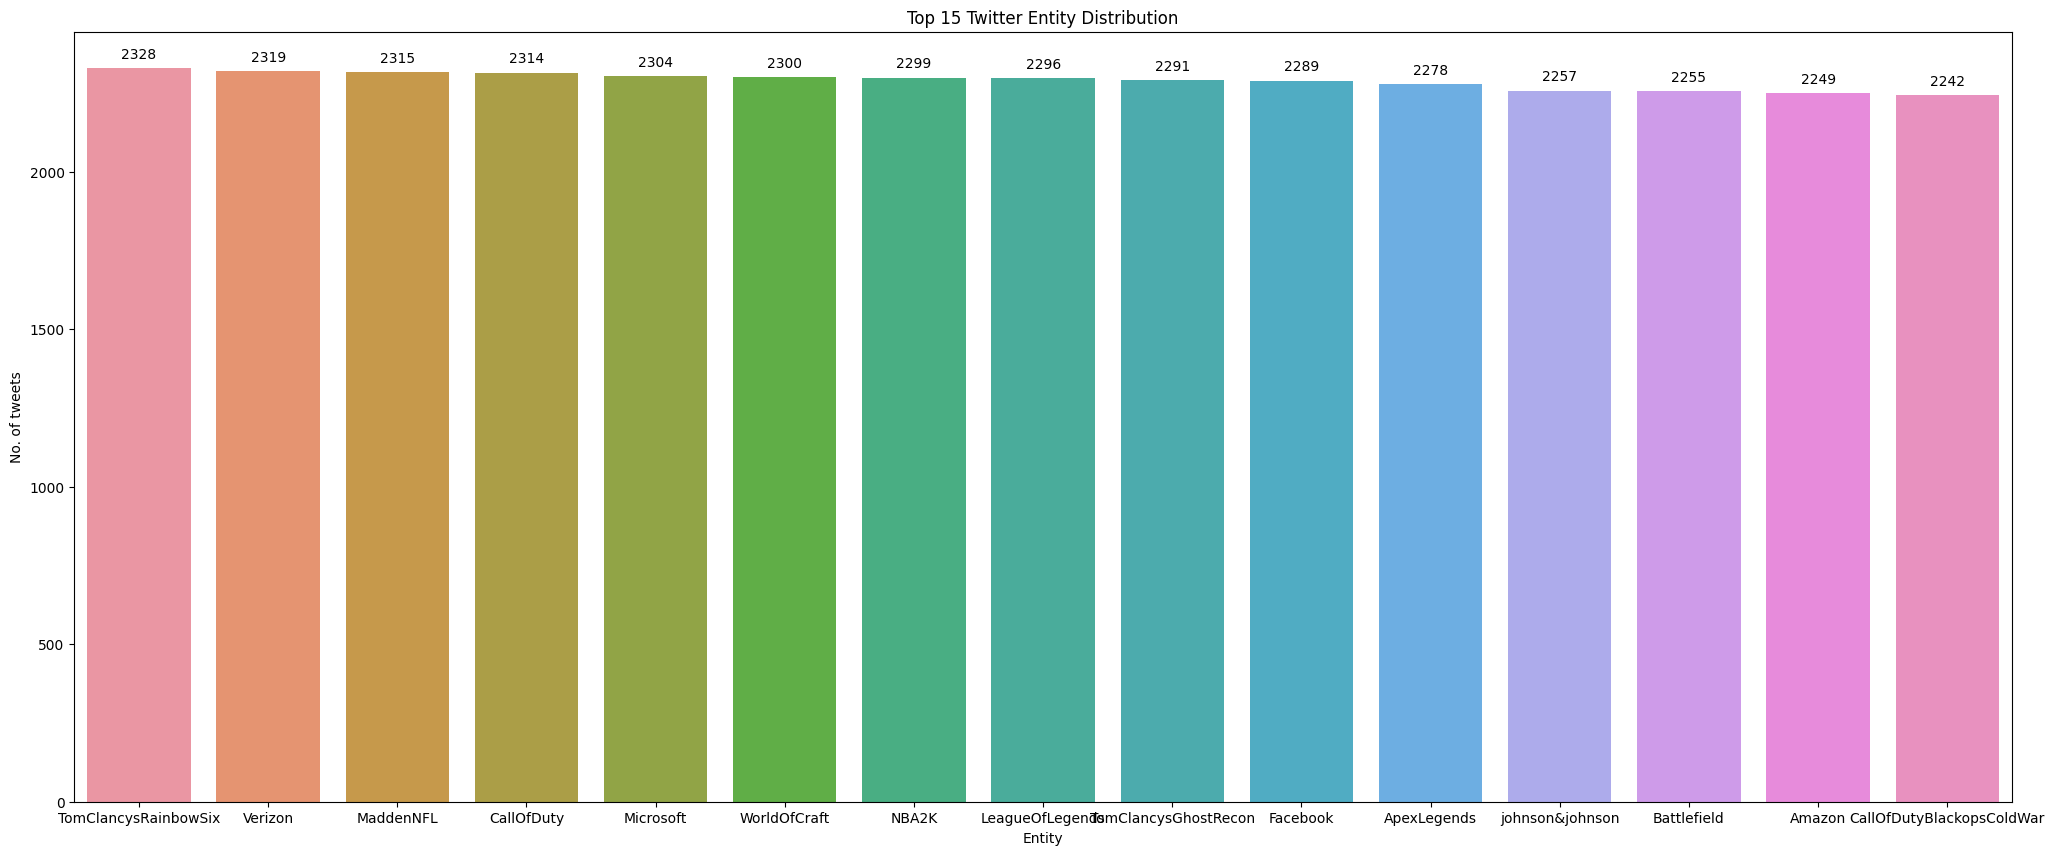

In [ ]:
# Visualizing first 15 twitter entity
top15_entity=train_data['Entity'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(25,10))
ax=sns.barplot(x = top15_entity.index, y = top15_entity.values)
ax.bar_label(ax.containers[0], label_type='edge', padding=5)
plt.xlabel("Entity")
plt.ylabel("No. of tweets")
plt.title("Top 15 Twitter Entity Distribution")
plt.show()
# it is clear that out of first 15 entities TomClancyRainbbowSix had more tweets

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Visualizing the important words for sentiment
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

word_counts = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}

pattern = re.compile('[^\w ]')
for text, t in zip(train_data['Tweet_content'], train_data['Sentiment']):
    text = re.sub(pattern, '', text).lower().split()
    text = [word for word in text if word not in stopwords_list]
    word_counts[t].extend(text)

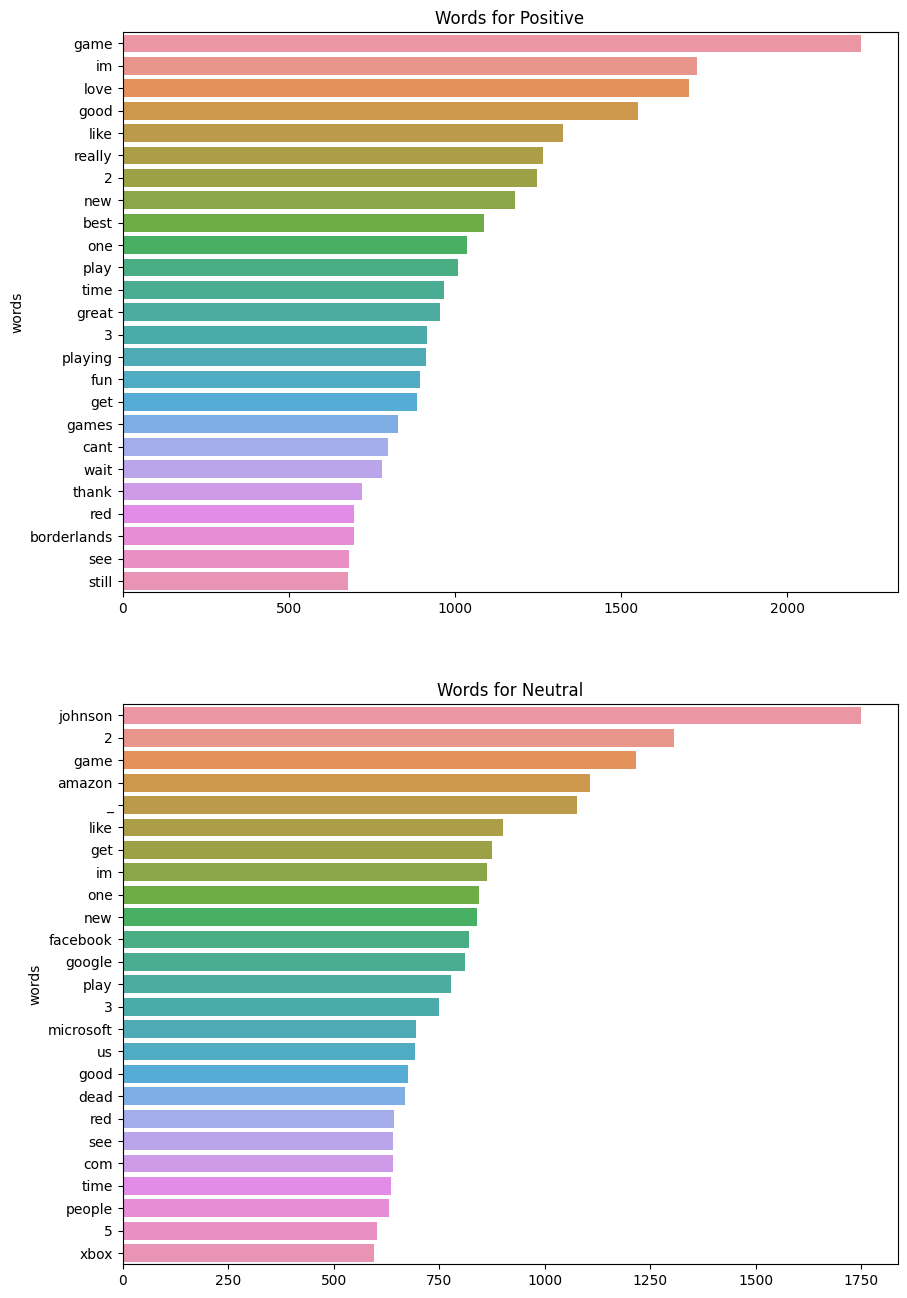

In [ ]:
fig, axes = plt.subplots(2, figsize=(10,16))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Words for {target}')
    axis.set_ylabel('words')
plt.show()

In [ ]:
# Heatmap
data1=pd.crosstab(train_data['Entity'], train_data['Sentiment'])

<Axes: xlabel='Sentiment', ylabel='Entity'>

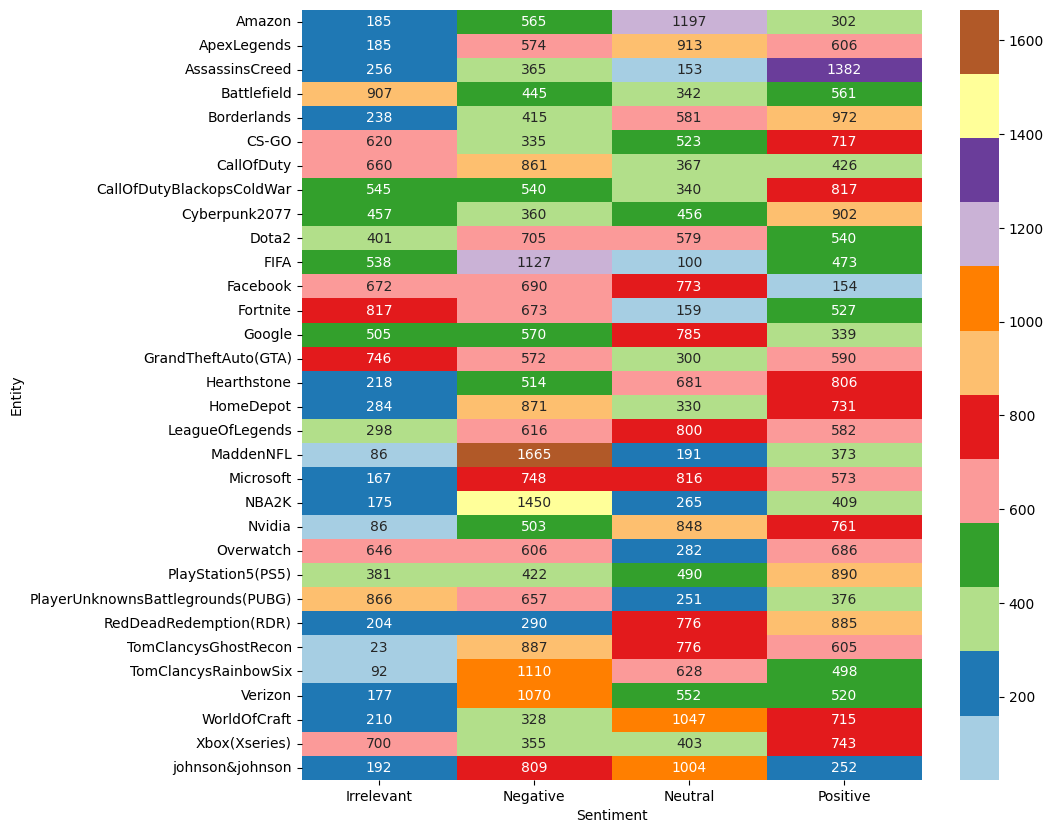

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data1, annot=True,cmap='Paired',fmt="")

In [ ]:
# Data cleaning
def preprocess_text(text):
    # Handling NaN values
    if isinstance(text, float) and np.isnan(text):
        return ""

    # Converting text to lowercase
    text = text.lower()

    # Removing special characters, URLs, and mentions
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text


In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Sentiment'] = label_encoder.fit_transform(train_data['Sentiment'])
test_data['Sentiment'] = label_encoder.fit_transform(test_data['Sentiment'])
train_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,I am coming to the borders and I will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...


In [ ]:
train_data['Tweet_content'] = train_data['Tweet_content'].apply(preprocess_text)
test_data['text'] = test_data['Tweet_content'].apply(preprocess_text)

In [ ]:
# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(train_data['Tweet_content'])
X_test = tfidf_vectorizer.transform(test_data['Tweet_content'])

In [ ]:
# vectorizer=TfidfVectorizer()
# X = vectorizer.fit_transform(train_data['Tweet_content']).toarray()
y_train = train_data['Sentiment']
y_test=test_data['Sentiment']


In [ ]:
# Applying model and making predictions
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
y_pred

array([0, 2, 1, 1, 3, 1, 2, 0, 3, 1, 3, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2,
       3, 1, 2, 2, 1, 2, 3, 2, 3, 3, 1, 3, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2,
       3, 2, 2, 1, 1, 2, 3, 1, 1, 2, 0, 3, 3, 2, 1, 3, 1, 3, 3, 0, 1, 2,
       1, 0, 1, 1, 3, 1, 3, 1, 3, 0, 3, 0, 2, 2, 1, 3, 3, 2, 1, 2, 1, 0,
       1, 2, 2, 2, 3, 3, 0, 1, 2, 0, 0, 2, 2, 2, 3, 3, 2, 3, 2, 3, 1, 2,
       2, 2, 1, 3, 1, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 1, 2, 0, 3,
       3, 3, 3, 0, 3, 2, 0, 0, 0, 2, 2, 0, 3, 1, 3, 2, 2, 1, 0, 1, 2, 2,
       3, 0, 2, 1, 2, 3, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 3, 3, 3, 2, 2, 3,
       0, 2, 2, 2, 3, 0, 1, 1, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 2, 1, 1, 1,
       1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 3, 0, 2, 1, 1, 3, 1,
       0, 1, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0,
       3, 3, 0, 0, 3, 3, 1, 1, 3, 2, 3, 3, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2,
       1, 3, 2, 0, 1, 2, 0, 3, 2, 0, 1, 2, 1, 0, 3, 1, 1, 1, 3, 2, 2, 3,
       2, 2, 1, 3, 1, 3, 1, 0, 2, 2, 3, 1, 2, 1, 3,

In [ ]:
# Checking accuracy
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.82
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       172
           1       0.88      0.83      0.85       266
           2       0.75      0.84      0.79       285
           3       0.83      0.79      0.81       277

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

